In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Importing seaborn sets nice default options for plotting but is not necessary
import seaborn as sns

import calliope

In [2]:
# Creating a new Model object without any parameters loads the built-in example

model = calliope.Model()

In [3]:
# Construct and solve the model. Results are loaded into `model.solution`.

model.run()

In [4]:
# `model.solution` is an xarray.Dataset which with the different variables
# indexed by dimensions including x (locations), y (technology), t (time),
# k (cost class), c (carrier), alongside several additional dimensions used
# in some of the summary variables such as `summary` and `metadata`

model.solution

<xarray.Dataset>
Dimensions:          (c: 1, cols_groups: 3, cols_metadata: 6, cols_shares: 3, cols_summary: 7, k: 1, t: 120, techs: 9, x: 5, y: 6)
Coordinates:
  * y                (y) object 'ccgt' 'csp' 'demand_power' 'hvac:r1' ...
  * x                (x) object 'csp1' 'csp2' 'csp3' 'r1' 'r2'
  * t                (t) datetime64[ns] 2005-01-01 2005-01-01T01:00:00 ...
  * c                (c) object 'power'
  * k                (k) object 'monetary'
  * cols_metadata    (cols_metadata) object 'type' 'name' 'carrier' ...
  * techs            (techs) object 'ccgt' 'csp' 'demand' 'demand_power' ...
  * cols_summary     (cols_summary) object 'cf' 'levelized_cost_monetary' ...
  * cols_groups      (cols_groups) object 'members' 'group' 'type'
  * cols_shares      (cols_shares) object 'e_prod' 'e_con' 'e_cap'
Data variables:
    s                (y, x, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rs               (y, x, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rbs  

In [5]:
# We can sum power output over all locations and turn the result into
# a pandas.DataFrame

df_power = model.solution['e'].loc[dict(c='power')].sum(dim='x').to_pandas().T

df_power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2005-01-01 00:00:00 to 2005-01-05 23:00:00
Data columns (total 6 columns):
ccgt                  120 non-null float64
csp                   120 non-null float64
demand_power          120 non-null float64
hvac:r1               120 non-null float64
hvac:r2               120 non-null float64
unmet_demand_power    120 non-null float64
dtypes: float64(6)
memory usage: 6.6 KB


In [6]:
# Using .head() to see the first few rows:

df_power.head()

y,ccgt,csp,demand_power,hvac:r1,hvac:r2,unmet_demand_power
t,,,,,,
2005-01-01 00:00:00,30000.000000,0.0,-29783.769136,3476.049303,-4089.469769,397.189601
2005-01-01 01:00:00,29299.482469,0.0,-28653.251992,3661.972702,-4308.203179,0.000000
2005-01-01 02:00:00,28543.585490,0.0,-27909.782639,3591.549489,-4225.352340,0.000000
2005-01-01 03:00:00,28003.775600,0.0,-27357.545123,3661.972702,-4308.203179,0.000000
2005-01-01 04:00:00,28083.101263,0.0,-27424.443161,3732.395915,-4391.054018,0.000000


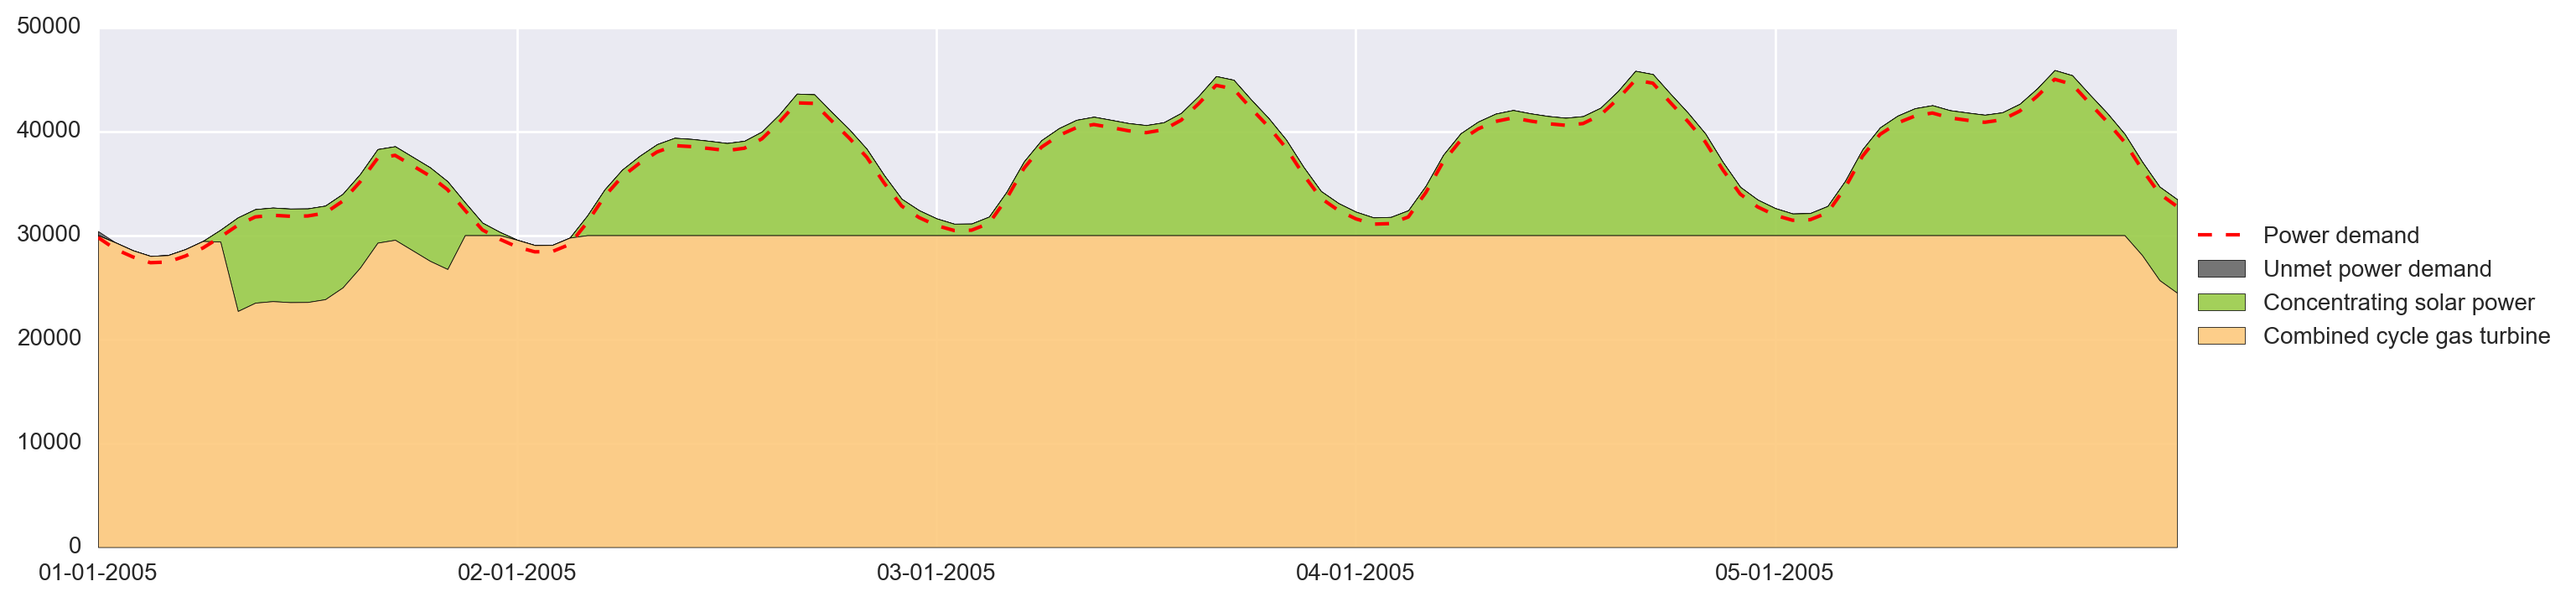

In [7]:
# We can plot this by using the plot_carrier_production function
# Note this is using the colors, names, and stack_weights defined for
# each technology in the model configuration

calliope.analysis.plot_carrier_production(model.solution, carrier='power')

(0, 35000)

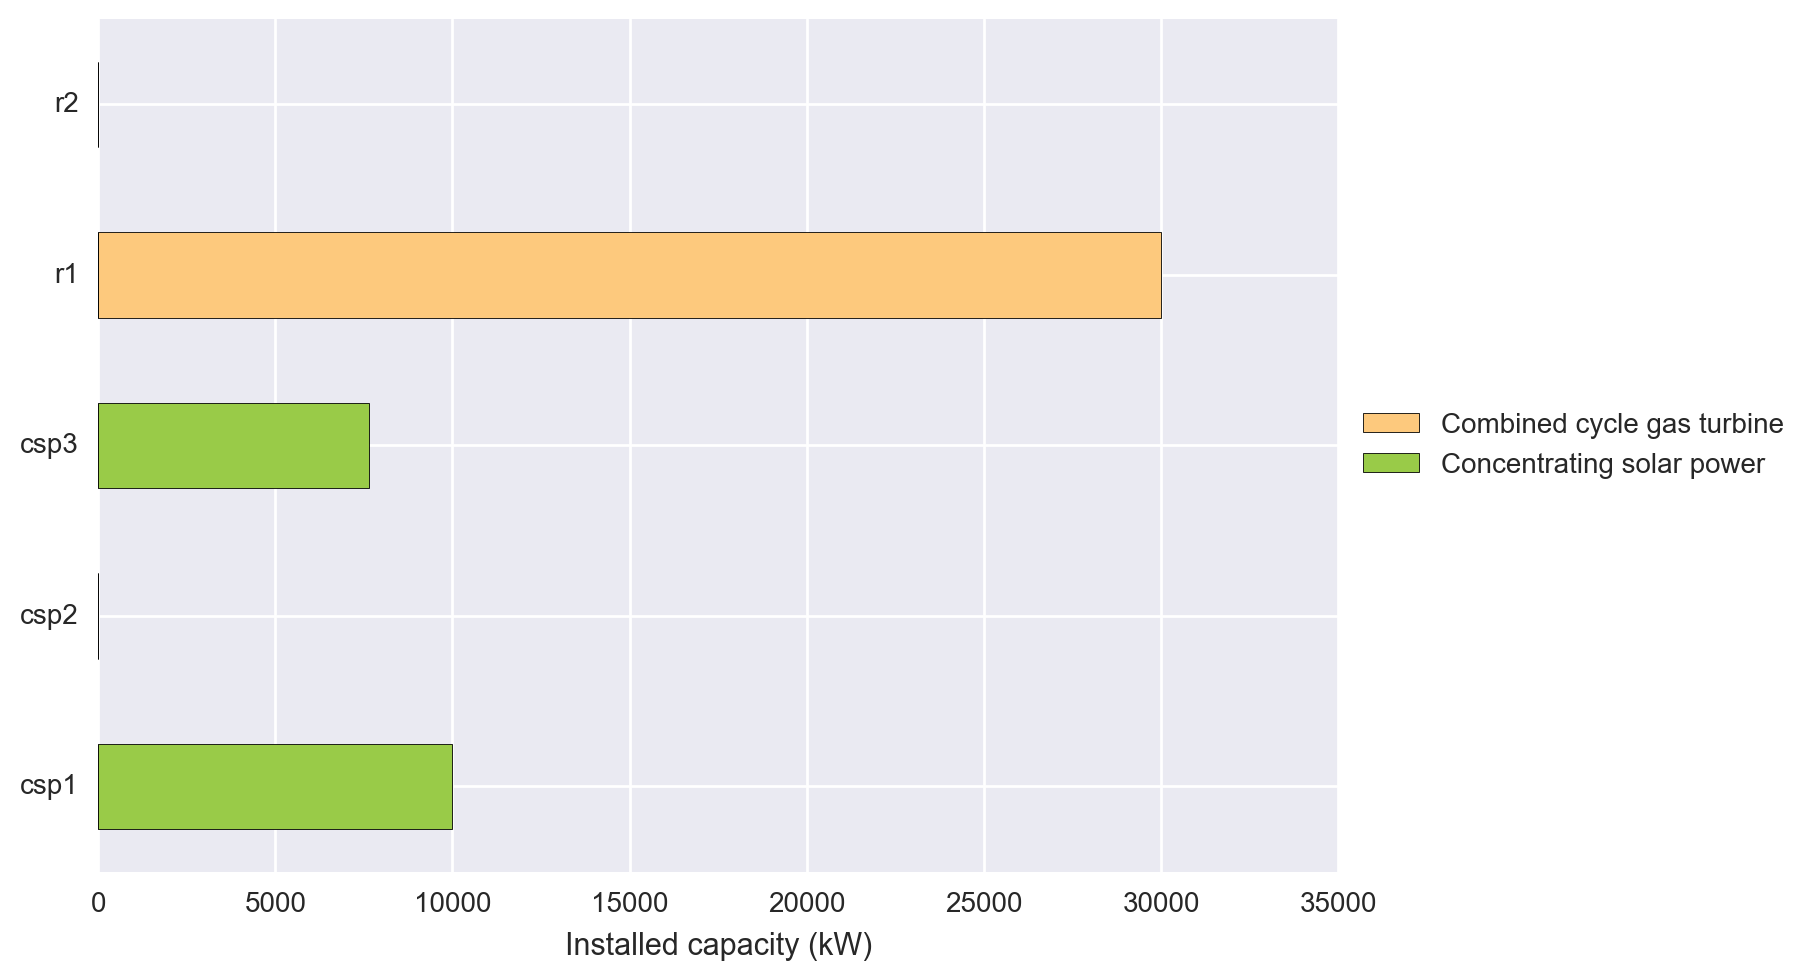

In [8]:
# plot_installed_capacities gives a graphical view of the `e_cap` variable
# for supply technologies

calliope.analysis.plot_installed_capacities(model.solution)
plt.xlim(0, 35000)

In [9]:
# We can also examine total technology costs

model.solution['costs'].loc[dict(k='monetary')].to_pandas()

x,csp1,csp2,csp3,r1,r2
y,,,,,
ccgt,0.000000,0.000000e+00,0.000000,174813.005687,0.000000e+00
csp,109611.362041,-4.463698e-10,64057.861708,0.000000,0.000000e+00
demand_power,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
hvac:r1,0.000000,0.000000e+00,0.000000,0.000000,1.877083e+03
hvac:r2,0.000000,0.000000e+00,0.000000,887.736279,0.000000e+00
unmet_demand_power,0.000000,0.000000e+00,0.000000,0.000000,3.971896e+11


In [10]:
# We can examine levelized costs for each location and technology

model.solution['levelized_cost'].loc[dict(c='power', k='monetary')].to_pandas()

y,ccgt,csp,demand_power,hvac:r1,hvac:r2,unmet_demand_power
x,,,,,,
csp1,NaN,0.138453,NaN,NaN,NaN,NaN
csp2,NaN,4.137871,NaN,NaN,NaN,NaN
csp3,NaN,0.409212,NaN,NaN,NaN,NaN
r1,0.049643,NaN,NaN,NaN,0.0,NaN
r2,NaN,NaN,NaN,0.003795,NaN,1.000000e+09


In [11]:
# And we can get an aggregated summary of results

model.solution['summary'].to_pandas()

cols_summary,cf,levelized_cost_monetary,e_prod,e_con,e_cap,r_area,s_cap
techs,,,,,,,
ccgt,0.978174,4.964266e-02,3.521427e+06,0.000000e+00,30000.000000,0.000000,0.000000
csp,0.497525,1.831521e-01,9.482239e+05,0.000000e+00,17647.058824,245661.187436,526335.669181
demand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
demand_power,0.000000,NaN,0.000000e+00,-4.382753e+06,45000.000000,5.000000,0.000000
hvac,0.700787,3.794591e-03,4.946732e+05,-5.819685e+05,11764.705882,0.000000,0.000000
supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unmet_demand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unmet_demand_power,0.008333,1.000000e+09,3.971896e+02,0.000000e+00,397.189601,0.000000,0.000000


In [12]:
# Get levelized cost of power supply at specific locations
# (excluding transmission costs by default)

calliope.analysis.get_levelized_cost(
    model.solution,
    locations=['csp1', 'csp2', 'csp3']
)

x,csp1,csp2,csp3
y,,,
ccgt,NaN,NaN,NaN
csp,0.138453,4.137871,0.409212


In [13]:
# Get overall levelized cost of power supply from different technologies

calliope.analysis.get_levelized_cost(model.solution)

y
ccgt    0.049643
csp     0.183152
dtype: float64

In [14]:
# Get overall levelized cost of delivered power in the system

calliope.analysis.get_delivered_cost(model.solution)

0.080143015321675989

---

The ``calliope.analysis`` and ``calliope.analysis_utils`` modules provide numerous additional functions to analyze and plot model results. Their documentation is still work in progress.

See the [Calliope documentation](http://docs.callio.pe/) for more details on setting up and running a Calliope model.
